In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random


In [3]:
# 设置标签
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
           "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# 选择推理设备额
device = torch.device("cpu")

# 读取模型并且设置为评估模式
model = torch.load('./model/mnist_fashion.pth', map_location = device, weights_only = False)
model.to(device)
model.eval()

# 读取测试集
test_df = pd.read_csv('./input/fashion-mnist_test.csv')

/tmp/ipykernel_87108/4283823507.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = int(row[0])


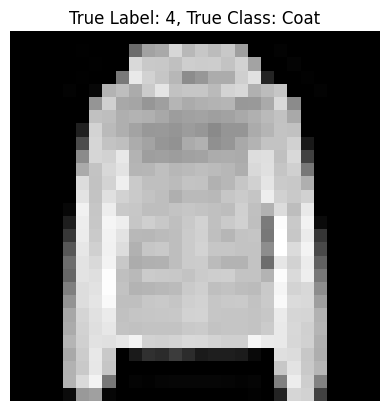

Predicted Label: 4, Predicted Class: Coat)


In [4]:

# 随机选取一张图片用于识别
index = random.randint(0, len(test_df) - 1)
row = test_df.iloc[index]
label = int(row[0]) 
image = row[1:].values.astype(np.uint8).reshape(28, 28)

# 显示选取的图片
plt.imshow(image, cmap='gray')
plt.title(f"True Label: {label}, True Class: {classes[label]}")
plt.axis('off')
plt.show()

# 归一化图片
image = image.astype(np.float32) / 255.0  
image_tensor = torch.tensor(image, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
image_tensor = image_tensor.to(device)

# 进行推理并输出结果
with torch.no_grad():
    output = model(image_tensor)
    _, predicted = torch.max(output, 1)

print(f"Predicted Label: {predicted.item()}, Predicted Class: {classes[predicted.item()]})")